In [1]:
import pandas as pd
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv(f"../../data/geometric_mean_analysis.csv")

for i in range(3):
    data[f"input{i}"] = data[f"input{i}"].apply(lambda x: mpz(x))
    
data["gm_mul"] = data.input0 * data.input1 * data.input2
    
data["gm_ideal"] = data["gm_ideal"].apply(lambda x: mpz(x))
data["gm_old"] = data["gm_old"].apply(lambda x: mpz(x))
data["gm_opt"] = data["gm_opt"].apply(lambda x: mpz(x))
data["gm_old_diff"] = data.gm_old - data.gm_ideal
data["gm_opt_diff"] = data.gm_opt - data.gm_ideal

data

,input0,input1,input2,gm_ideal,gm_old,gm_opt,gm_oldgas,gm_optgas,gm_mul,gm_old_diff,gm_opt_diff
0,70344564206782881138018910,44947759071156165783783308,20573673422447380278635606,40217661071555795512983552,40217661071555793505021163,40217661071555793505021163,7793,2834,6505046861650168834022620877785969345098625211...,-2007962389,-2007962389
1,6275216306695815140890313,95771998582089011244922670,54405290569726656239422758,31976883034901962437951488,31976883034901963150104096,31976883034901963150104096,10116,3558,3269703597269649465632227828007953374238686276...,712152608,712152608
2,37503932871867431328020149,2145842848617367888877819,53528858646513988400211068,16271249445192973003259904,16271249445192972152989860,16271249445192972152989860,10048,3540,4307871191981158377772015527627840770580852414...,-850270044,-850270044
3,88830299723331510724266521,22084955672413765391177320,11203294764106985724190948,28011377989583221091729408,28011377989583221613119146,28011377989583221613119146,9659,3468,2197877190749906068760908364957441991179093326...,521389738,521389738
4,78250943094002442463113577,75491063839361853959623872,26403873586223024443483014,53829158456973123316088832,53829158456973126739152765,53829158456973126739152765,7735,2814,1559742014621948132982941800437539694651182698...,3423063933,3423063933
...,...,...,...,...,...,...,...,...,...,...,...
9995,20681114086642482161018395,16641251522990925498094435,11673205588426550648445098,15897055233783591335886848,15897055233783591698650981,15897055233783591698650981,6773,2487,4017446014570566386400397333451724512117563722...,362764133,362764133
9996,1018644817221632468283501,17747742755274023879222451,27129725499535106887393118,7886248083653840152297472,7886248083653840107397347,7886248083653840107397347,10165,3564,4904687081321276750419080756403557168434110377...,-44900125,-44900125
9997,64008973160950379052796338,1764070020861741295894685,26048771958211895936472031,14327859402070535834697728,14327859402070536615364561,14327859402070536615364561,10893,3831,2941331225686755406631764139666190470299779638...,780666833,780666833
9998,27310571899139232381151360,9987125525896459155876530,28116847652136519480722281,19720260319648323536420864,19720260319648325469063008,19720260319648325469063008,8182,2906,7668985750074061206841932814949077029024873473...,1932642144,1932642144


In [3]:
(data.gm_old_diff == data.gm_opt_diff).all()

True

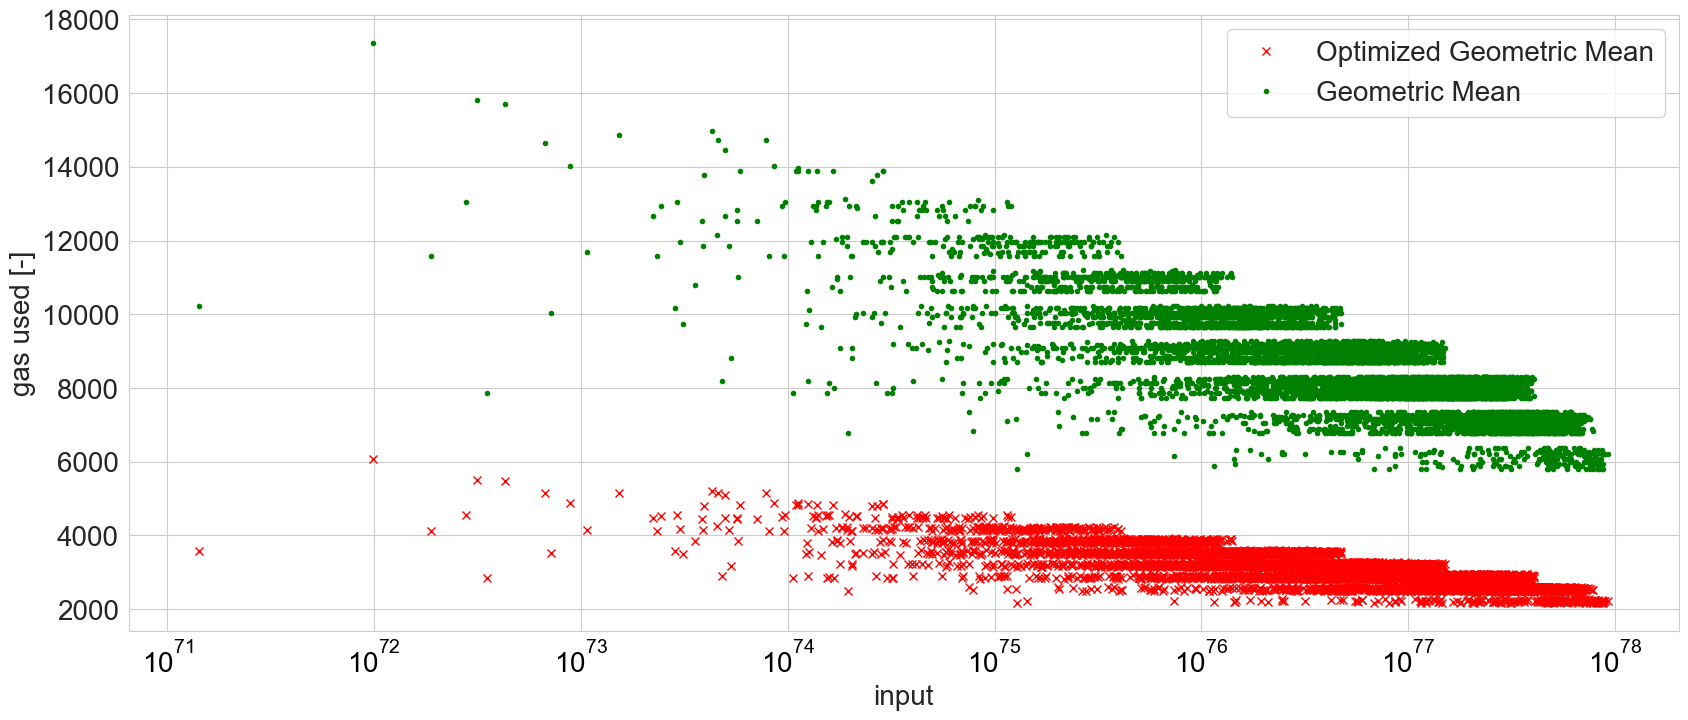

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_optgas,
    'x',
    color="red",
    label="Optimized Geometric Mean"
)

ax.plot(
    data.gm_mul,
    data.gm_oldgas,
    '.',
    color="green",
    label="Geometric Mean"
)

ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20);

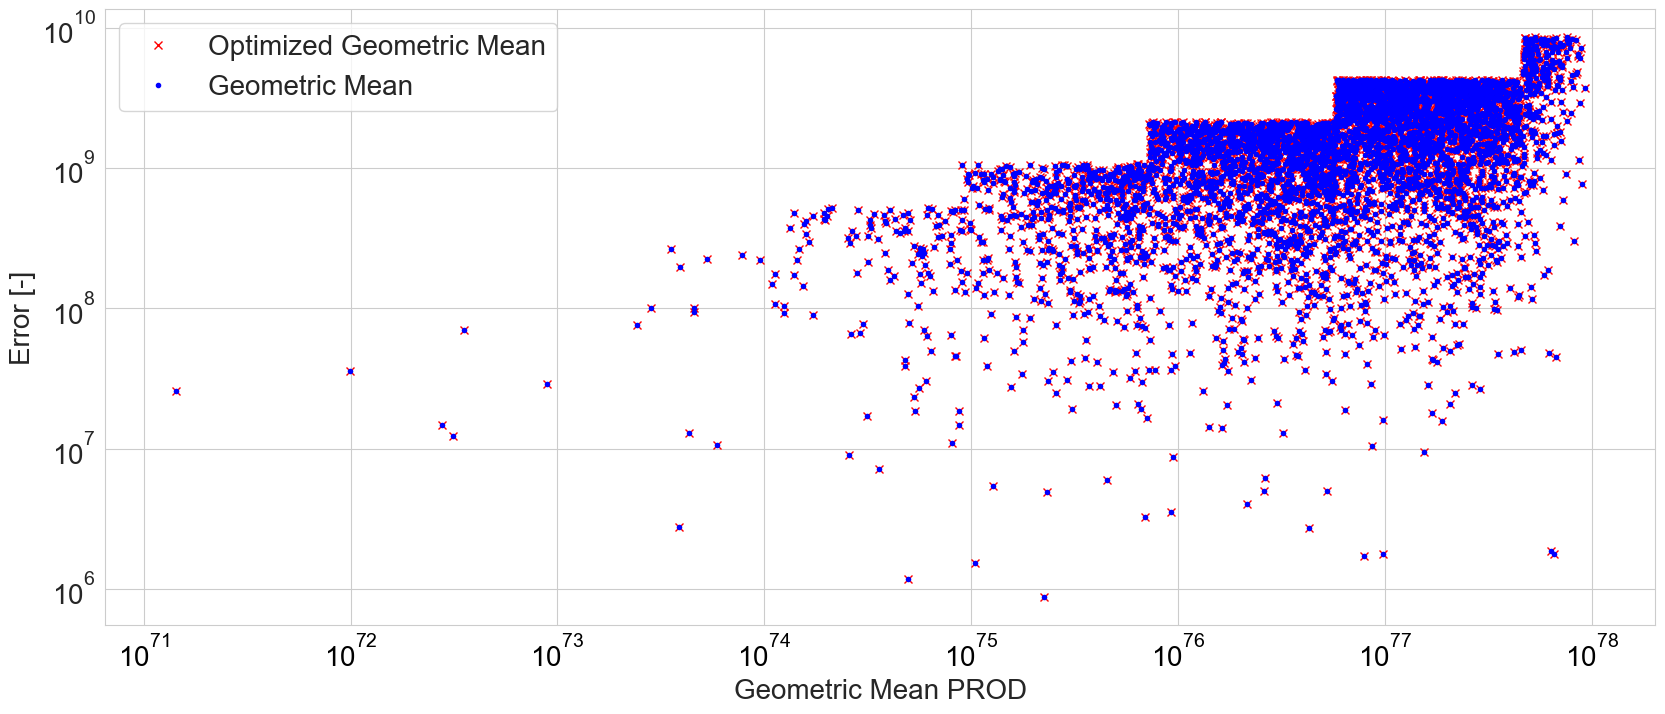

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    'x',
    color="red",
    label="Optimized Geometric Mean"
)
ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    '.',
    color="blue",
    label="Geometric Mean"
)

ax.set_xlabel("Geometric Mean PROD", fontsize=20)
ax.set_ylabel("Error [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=20);

In [6]:
float(data.gm_mul[data.gm_opt_diff.astype(float).idxmin()])

5.110961171485063e+77